In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# For inline plotting in notebook
%matplotlib inline

In [3]:
# Load the dataset - adjust the filename based on what you have
# Try these common filenames:
try:
    df = pd.read_csv('../data/raw/data.csv')
except:
    try:
        df = pd.read_csv('../data/raw/transactions.csv')
    except:
        # If you have a different filename, check what's in your folder
        import os
        print("Files in data/raw/:")
        print(os.listdir('../data/raw/'))
        # Load the actual file
        df = pd.read_csv('../data/raw/data.csv')  # Replace with actual

In [4]:
# 1. Check the shape
print("Dataset Shape:", df.shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# 2. Display first few rows
df.head()

Dataset Shape: (95662, 16)
Rows: 95662, Columns: 16


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# 3. Check column names and data types
print("\nColumn Information:")
print(df.info())

# 4. Get basic statistics for numerical columns
print("\nNumerical Columns Summary:")
df.describe()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
# 5. Check for missing values
print("\nMissing Values Summary:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})
missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)


Missing Values Summary:


,Missing Values,Percentage


In [7]:
# Check for duplicates
print(f"Total duplicate rows: {df.duplicated().sum()}")

# Check unique values in key columns
print("\nUnique values in important columns:")
important_cols = ['AccountId', 'CustomerId', 'ProviderId', 'ProductCategory', 'ChannelId']
for col in important_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

Total duplicate rows: 0

Unique values in important columns:
AccountId: 3633 unique values
CustomerId: 3742 unique values
ProviderId: 6 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values


Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


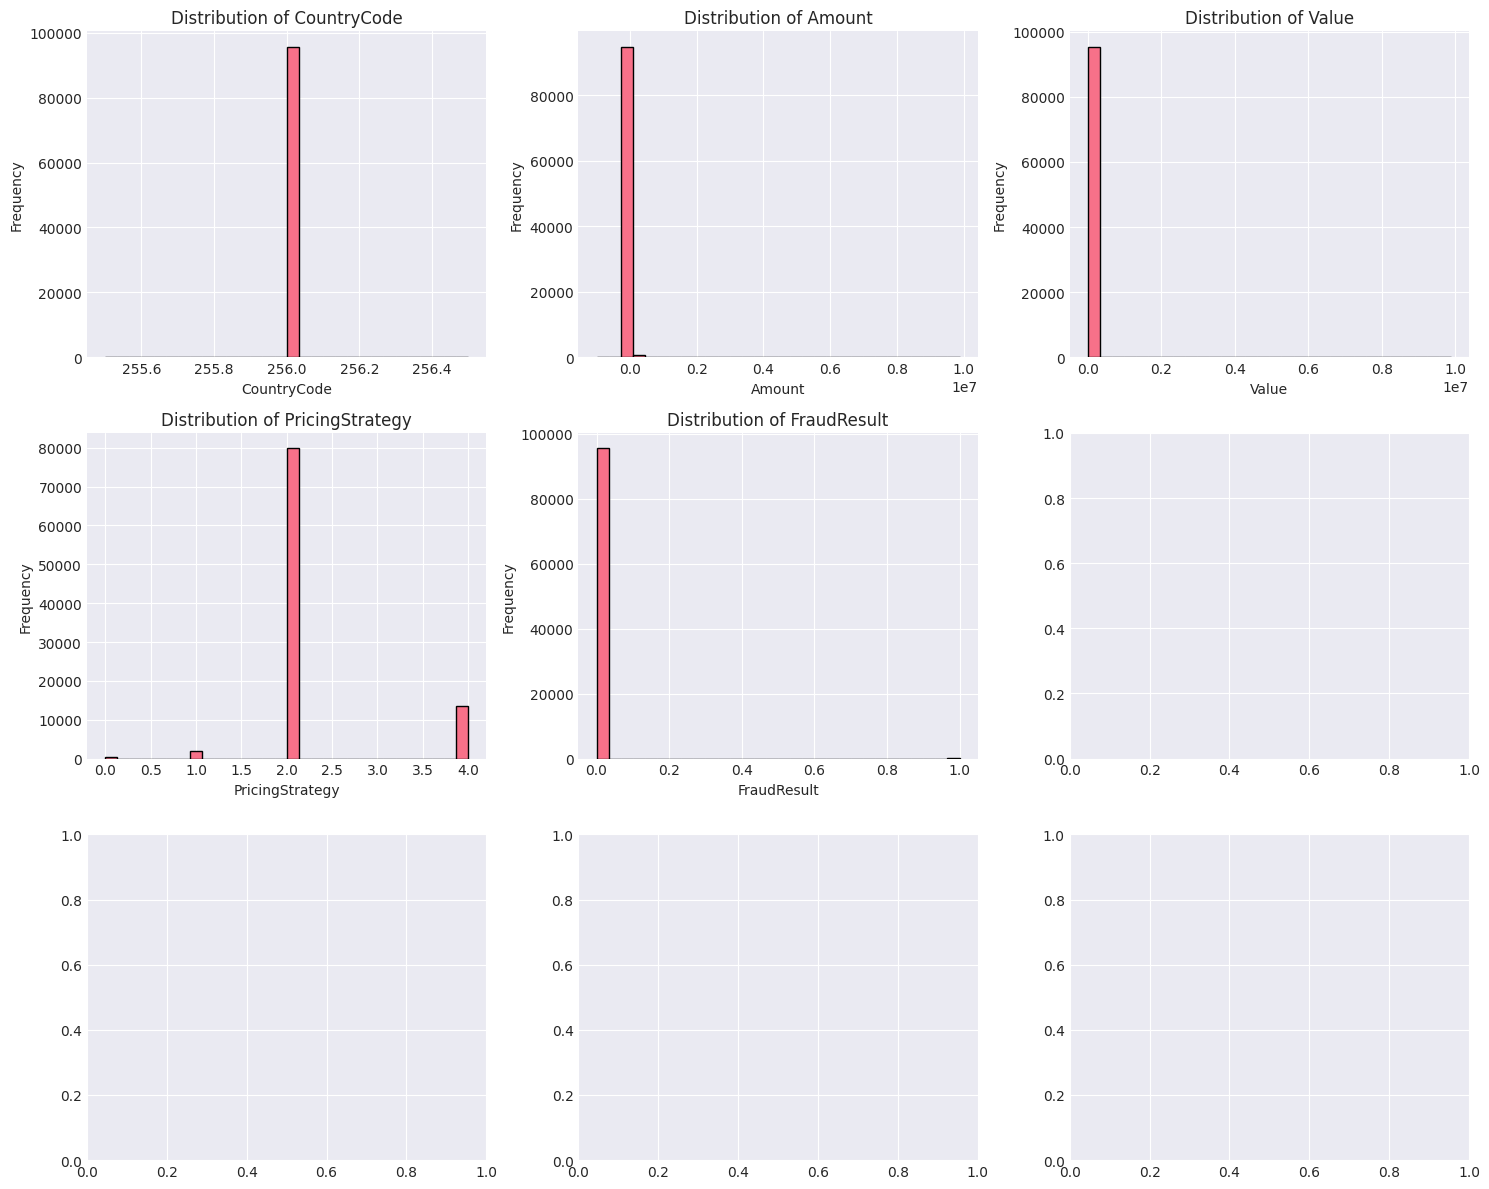

In [8]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Plot distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):  # First 9 numerical columns
    df[col].hist(ax=axes[idx], bins=30, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# If more than 9 numerical columns, create additional plots
if len(numerical_cols) > 9:
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, col in enumerate(numerical_cols[9:18]):  # Next 9
        if idx < 9:
            df[col].hist(ax=axes[idx], bins=30, edgecolor='black')
            axes[idx].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


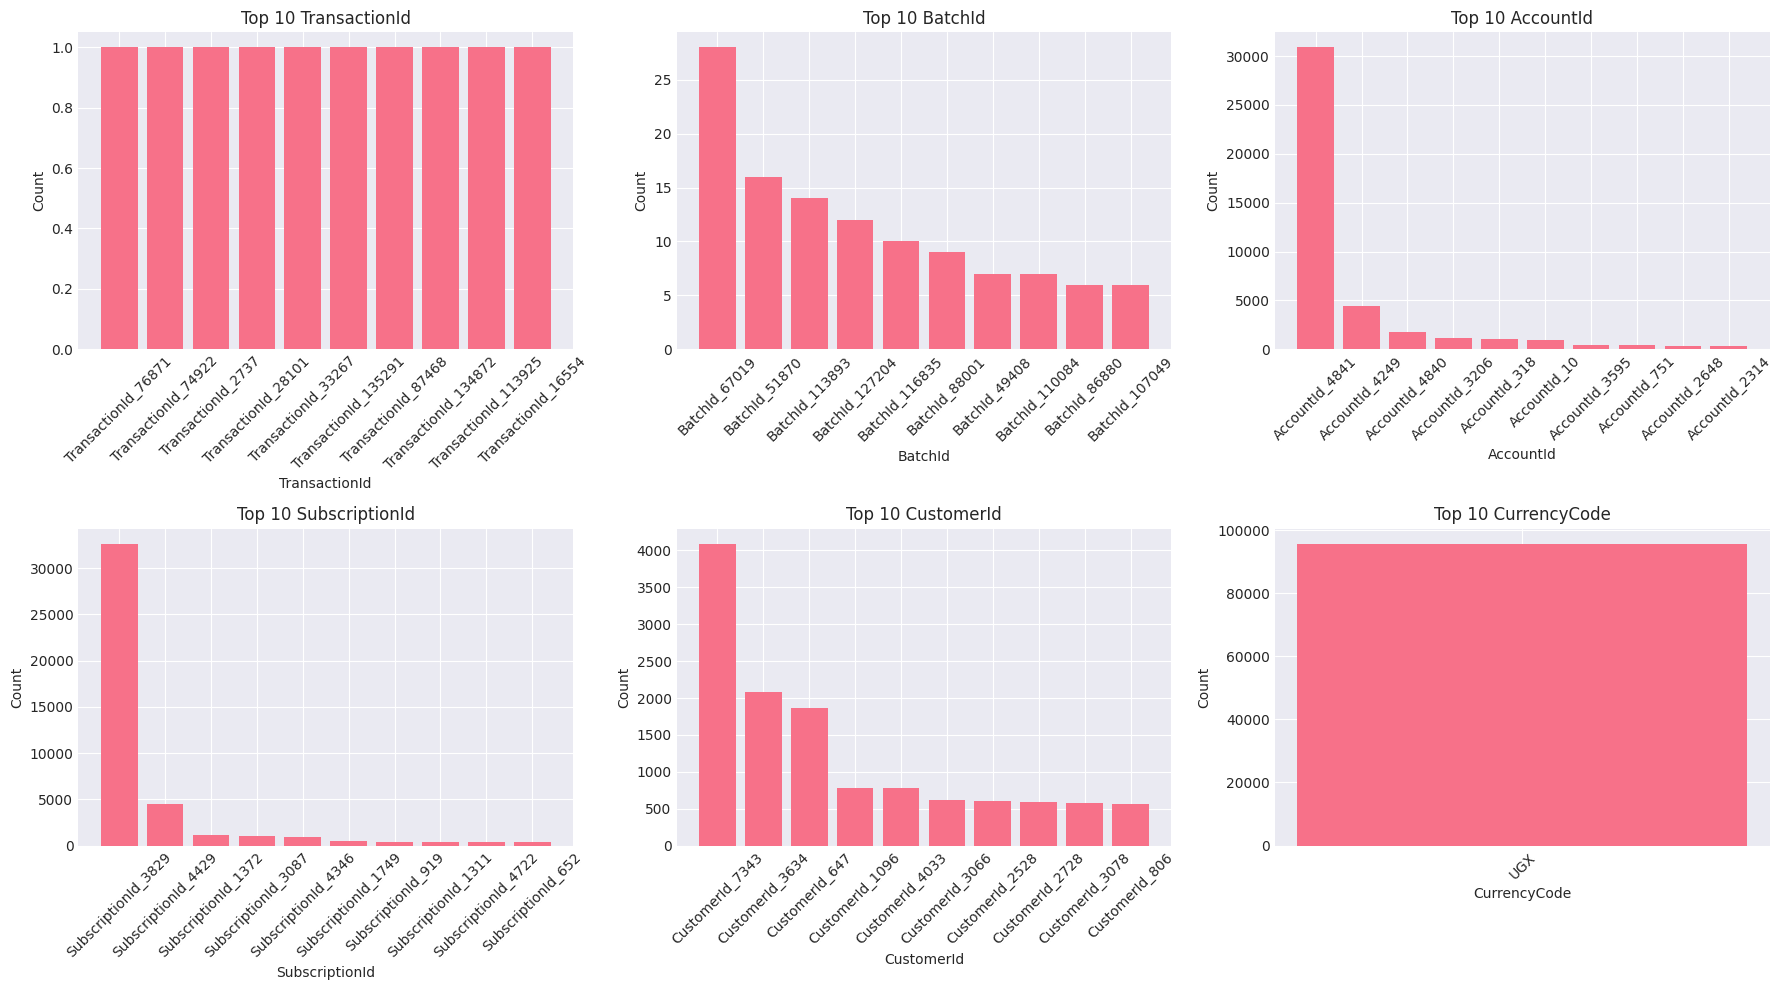

In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Plot top 10 categories for each categorical column
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:6]):  # First 6 categorical
    top_categories = df[col].value_counts().head(10)
    axes[idx].bar(top_categories.index.astype(str), top_categories.values)
    axes[idx].set_title(f'Top 10 {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

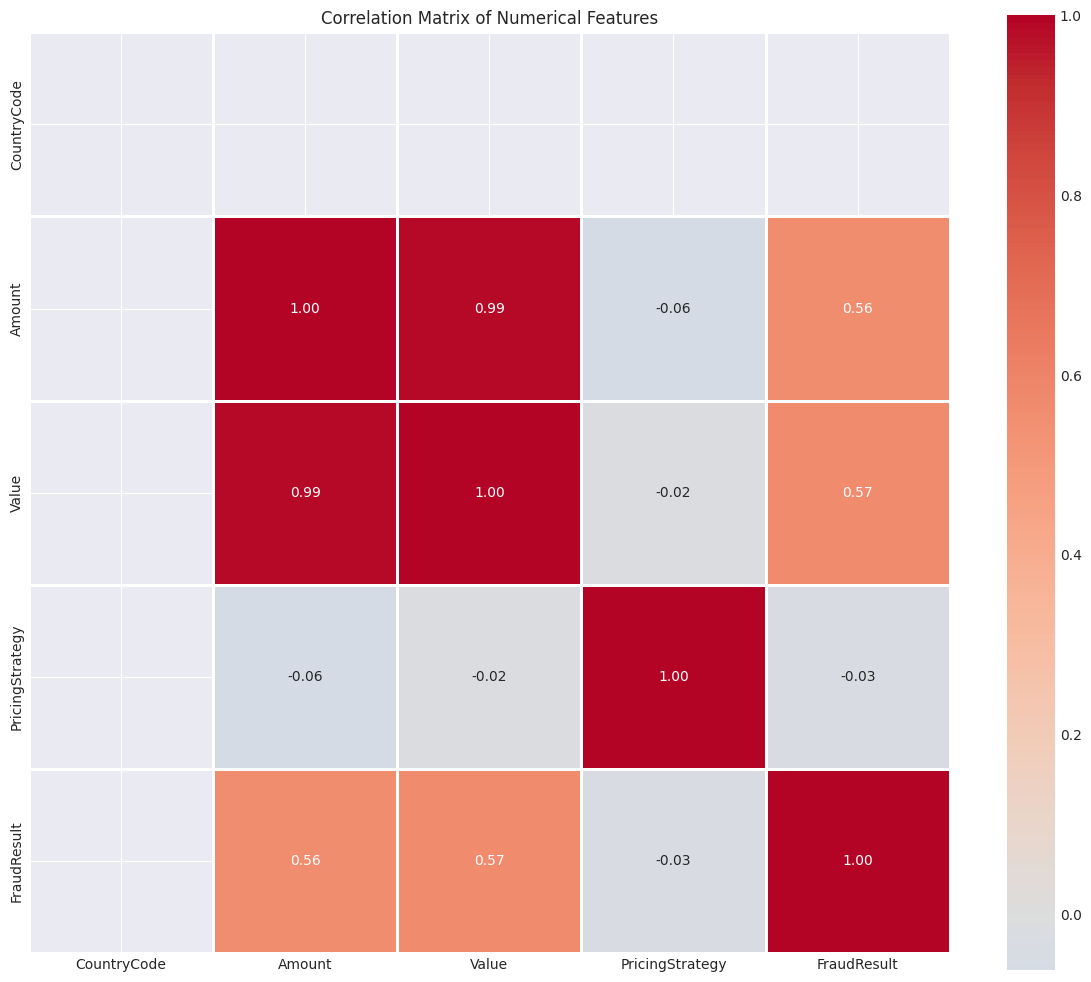


Highly Correlated Feature Pairs (|corr| > 0.7):
Amount - Value: 0.990


In [10]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find highly correlated features (absolute correlation > 0.7)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

print("\nHighly Correlated Feature Pairs (|corr| > 0.7):")
for pair in high_corr:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

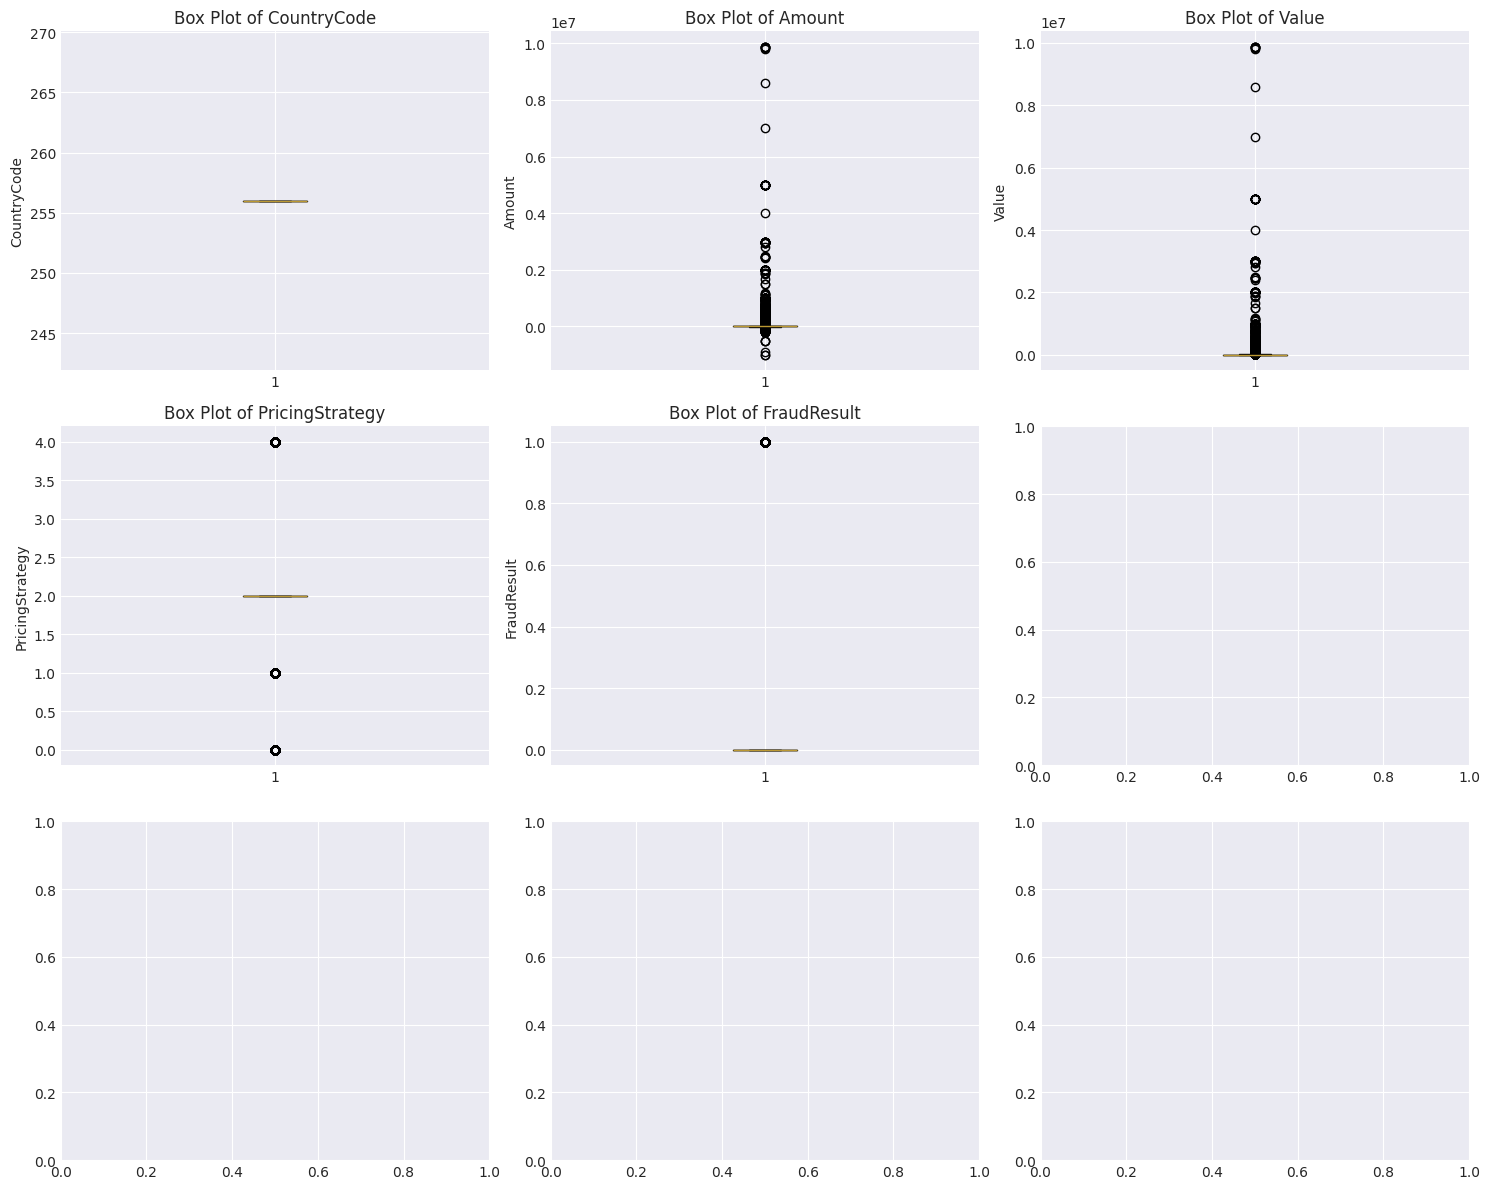

In [11]:
# Box plots for numerical columns to detect outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

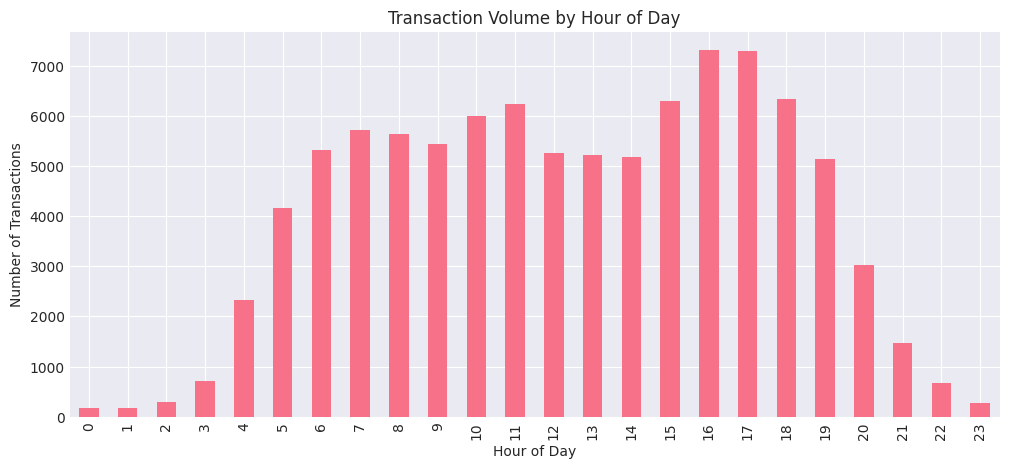

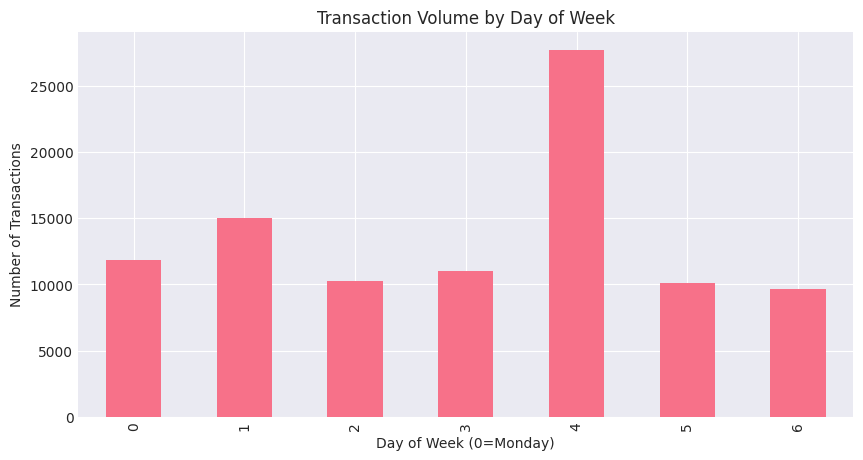

In [12]:
# Check if we have time data
if 'TransactionStartTime' in df.columns:
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time features
    df['transaction_hour'] = df['TransactionStartTime'].dt.hour
    df['transaction_day'] = df['TransactionStartTime'].dt.day
    df['transaction_month'] = df['TransactionStartTime'].dt.month
    df['transaction_weekday'] = df['TransactionStartTime'].dt.weekday
    
    # Plot transaction volume by hour
    plt.figure(figsize=(12, 5))
    df['transaction_hour'].value_counts().sort_index().plot(kind='bar')
    plt.title('Transaction Volume by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    # Plot transaction volume by weekday
    plt.figure(figsize=(10, 5))
    df['transaction_weekday'].value_counts().sort_index().plot(kind='bar')
    plt.title('Transaction Volume by Day of Week')
    plt.xlabel('Day of Week (0=Monday)')
    plt.ylabel('Number of Transactions')
    plt.show()

Customer Summary Statistics:
       transaction_count  total_amount    avg_amount    std_amount
count        3742.000000  3.742000e+03  3.742000e+03  3.030000e+03
mean           25.564404  1.717377e+05  1.571562e+04  1.680216e+04
std            96.929602  2.717305e+06  1.676991e+05  1.074311e+05
min             1.000000 -1.049000e+08 -4.250000e+05  0.000000e+00
25%             2.000000  4.077438e+03  1.000000e+03  1.533574e+03
50%             7.000000  2.000000e+04  2.583846e+03  5.389779e+03
75%            20.000000  7.996775e+04  4.877614e+03  7.549050e+03
max          4091.000000  8.345124e+07  8.601821e+06  3.309916e+06


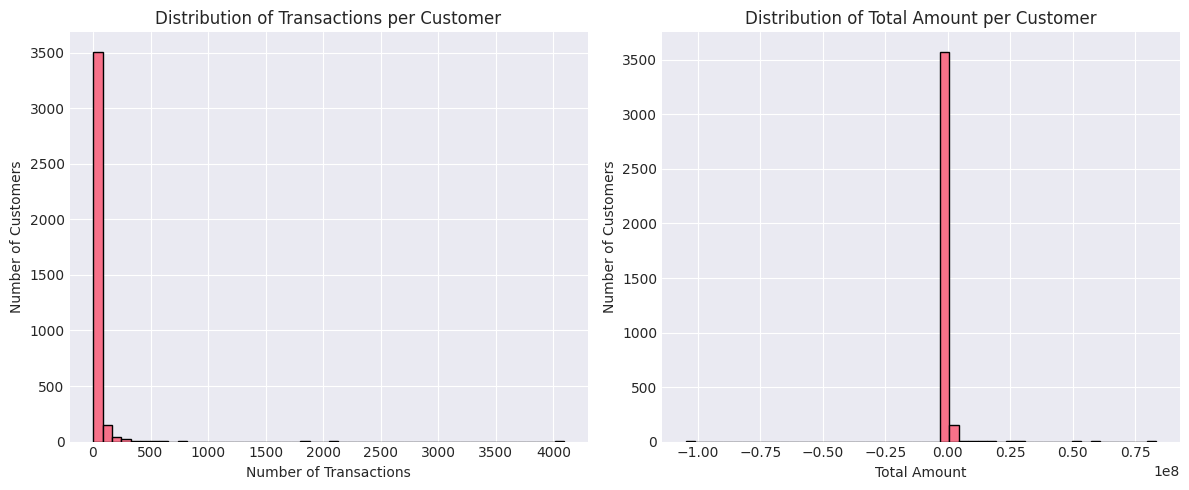

In [13]:
# Analyze at customer level (if CustomerId exists)
if 'CustomerId' in df.columns:
    # Calculate basic customer metrics
    customer_summary = df.groupby('CustomerId').agg({
        'TransactionId': 'count',
        'Amount': ['sum', 'mean', 'std']
    })
    customer_summary.columns = ['transaction_count', 'total_amount', 
                                'avg_amount', 'std_amount']
    
    print("Customer Summary Statistics:")
    print(customer_summary.describe())
    
    # Plot distribution of transaction counts per customer
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    customer_summary['transaction_count'].hist(bins=50, edgecolor='black')
    plt.title('Distribution of Transactions per Customer')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Number of Customers')
    
    plt.subplot(1, 2, 2)
    customer_summary['total_amount'].hist(bins=50, edgecolor='black')
    plt.title('Distribution of Total Amount per Customer')
    plt.xlabel('Total Amount')
    plt.ylabel('Number of Customers')
    
    plt.tight_layout()
    plt.show()

In [14]:
# Analyze fraud patterns
if 'FraudResult' in df.columns:
    print("\nFraud Analysis:")
    print(f"Total fraud cases: {df['FraudResult'].sum()}")
    print(f"Fraud rate: {(df['FraudResult'].sum() / len(df) * 100):.2f}%")
    
    # Fraud by various dimensions
    fraud_analysis_cols = ['ProviderId', 'ProductCategory', 'ChannelId']
    for col in fraud_analysis_cols:
        if col in df.columns:
            fraud_by_col = df.groupby(col)['FraudResult'].mean().sort_values(ascending=False)
            print(f"\nTop 5 {col} by fraud rate:")
            print(fraud_by_col.head())


Fraud Analysis:
Total fraud cases: 193
Fraud rate: 0.20%

Top 5 ProviderId by fraud rate:
ProviderId
ProviderId_3    0.020752
ProviderId_1    0.010101
ProviderId_5    0.004401
ProviderId_4    0.000131
ProviderId_6    0.000088
Name: FraudResult, dtype: float64

Top 5 ProductCategory by fraud rate:
ProductCategory
transport             0.080000
utility_bill          0.006250
financial_services    0.003546
airtime               0.000400
data_bundles          0.000000
Name: FraudResult, dtype: float64

Top 5 ChannelId by fraud rate:
ChannelId
ChannelId_1    0.007435
ChannelId_3    0.003232
ChannelId_2    0.000135
ChannelId_5    0.000000
Name: FraudResult, dtype: float64
